# MSCS3045    Lab 2   -  Pandas on Ice

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The National Snow and Ice Data Center (https://nsidc.org/) maintains a lot of information about snow and ice.  One of their datasets concerns "sea ice," that is, ice which is floating on some ocean or other seawater body.  Almost all of this is either in the Arctic or Antarctic regions and, as you can imagine, the extent of the ice changes over the course of each year.  It's also changing in longer timeframes and this has attracted quite a lot of attention from climate scientists.  We're going to look at some data on the extent of Arctic ice.  There's a nifty tool for visualizing the data we're going to look at here: https://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/

Begin by having a look at https://nsidc.org/data/g02135 and downloading the data file for this lab.  

Load the data into Pandas - you might want to look at some of the options to read_csv()

In [3]:
df = pd.read_csv("/content/N_seaice_extent_daily_v3.0.csv")
print(df)

       Year   Month   Day       Extent      Missing  \
0      YYYY      MM    DD   10^6 sq km   10^6 sq km   
1      1978      10    26       10.231            0   
2      1978      10    28        10.42            0   
3      1978      10    30       10.557            0   
4      1978      11     1        10.67            0   
...     ...     ...   ...          ...          ...   
14170  2022       2    19       14.712            0   
14171  2022       2    20       14.729            0   
14172  2022       2    21       14.933            0   
14173  2022       2    22       14.923            0   
14174  2022       2    23       14.882            0   

                                             Source Data  
0       Source data product web sites: http://nsidc.o...  
1       ['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...  
2       ['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...  
3       ['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...  
4       ['/ecs/DP1/PM/NSIDC-0051.001/1978.11

Use info() and head() to get a look at the data.  Also look at the columns attribute of your DataFrame.

In [4]:
df.info()
#printing info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14175 entries, 0 to 14174
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          14175 non-null  object
 1    Month        14175 non-null  object
 2    Day          14175 non-null  object
 3        Extent   14175 non-null  object
 4       Missing   14175 non-null  object
 5    Source Data  14175 non-null  object
dtypes: object(6)
memory usage: 664.6+ KB


In [5]:


df.head() #printing head followed by tail to see the order of data


,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,10.231,0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,10.42,0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,10.557,0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,1,10.67,0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...


In [6]:
df.tail()

,Year,Month,Day,Extent,Missing,Source Data
14170,2022,2,19,14.712,0,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.18/nt_202...
14171,2022,2,20,14.729,0,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.19/nt_202...
14172,2022,2,21,14.933,0,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.20/nt_202...
14173,2022,2,22,14.923,0,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.21/nt_202...
14174,2022,2,23,14.882,0,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.22/nt_202...


Find out what years are represented in this dataset.

In [7]:

years=df.Year.unique()
print("Years in the dataset are:\n\n",years)
print("\nThe length of years is:",len(years))

Years in the dataset are:

 ['YYYY' '1978' '1979' '1980' '1981' '1982' '1983' '1984' '1985' '1986'
 '1987' '1988' '1989' '1990' '1991' '1992' '1993' '1994' '1995' '1996'
 '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006'
 '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2018' '2019' '2020' '2021' '2022']

The length of years is: 46


Check the labels on the columns and if they have spaces in them, remove the spaces

In [8]:
df.columns = df.columns.str.replace(' ', '')
df

,Year,Month,Day,Extent,Missing,SourceData
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,10.231,0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,10.42,0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,10.557,0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,1,10.67,0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
...,...,...,...,...,...,...
14170,2022,2,19,14.712,0,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.18/nt_202...
14171,2022,2,20,14.729,0,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.19/nt_202...
14172,2022,2,21,14.933,0,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.20/nt_202...
14173,2022,2,22,14.923,0,['/ecs/DP1/PM/NSIDC-0081.001/2022.02.21/nt_202...


Drop the Missing and Source Data columns from the data, leaving the other columns.

In [9]:
#Rerun the cell from begining if reexecution is needed for the code in this cell
df.drop(df.columns[[4, 5]], axis=1, inplace=True)
df.drop(index=df.index[0], axis=0, inplace=True)
df


,Year,Month,Day,Extent
1,1978,10,26,10.231
2,1978,10,28,10.42
3,1978,10,30,10.557
4,1978,11,1,10.67
5,1978,11,3,10.777
...,...,...,...,...
14170,2022,2,19,14.712
14171,2022,2,20,14.729
14172,2022,2,21,14.933
14173,2022,2,22,14.923


Build a subset of the data with only rows from 2021

In [10]:
df1 = df.astype({'Year':'int', 'Month':'int', 'Day':'int', 'Extent':'float' })
year2021 = df1.query("Year == 2021")
year2021



,Year,Month,Day,Extent
13758,2021,1,1,12.702
13759,2021,1,2,12.671
13760,2021,1,3,12.704
13761,2021,1,4,12.770
13762,2021,1,5,12.814
...,...,...,...,...
14116,2021,12,27,12.947
14117,2021,12,28,12.978
14118,2021,12,29,13.050
14119,2021,12,30,13.149


Plot the Extent column for this subset

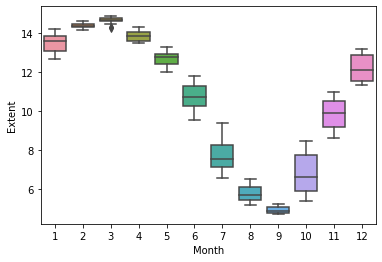

In [11]:
ax= sns.boxplot(x='Month',y='Extent', data = year2021)


:It turns out that the minimum extent is always sometime in September.  Build a version of the dataset with only the month of September for each year.

In [12]:
df_sep = pd.DataFrame(df1[df1.Month == 9])
df_sep


,Year,Month,Day,Extent
156,1979,9,1,7.228
157,1979,9,3,7.147
158,1979,9,5,7.037
159,1979,9,7,7.075
160,1979,9,9,7.092
...,...,...,...,...
14024,2021,9,26,5.131
14025,2021,9,27,5.145
14026,2021,9,28,5.120
14027,2021,9,29,5.138



Plot just the extent for September in 2021.  You should see that the minimum was on the 13th.  

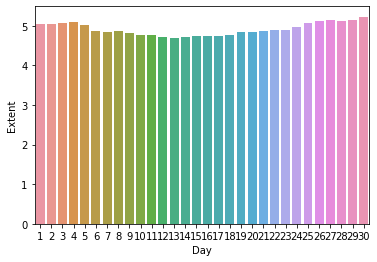

In [13]:
df_sep2021 = pd.DataFrame(df_sep[df_sep.Year == 2021])
sns.barplot(x= df_sep2021['Day'],y= df_sep2021['Extent'])

For each year, find the day (number starting with 1) of the minimum value.

In [32]:

# find the day of the minimum value for each year
Yr_min_day = df1.groupby('Year')['Extent'].idxmin()
min_day = df1.loc[Yr_min_day,:]
min_day

,Year,Month,Day,Extent
1,1978,10,26,10.231
166,1979,9,21,6.895
341,1980,9,5,7.533
526,1981,9,10,6.902
710,1982,9,13,7.160
890,1983,9,8,7.204
1077,1984,9,16,6.396
1256,1985,9,9,6.486
1437,1986,9,6,7.122
1624,1987,9,2,6.890


Create a plot of the minimum day for all the years in the set (skip any year with no September data) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[(1978.0, 2022.0), (1.0, 30.0)]

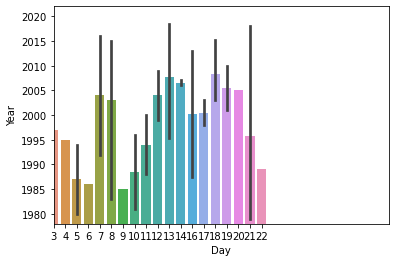

In [69]:
#minimum day for all the years in the set with no September data
min_day1 = min_day[min_day.Month == 9]
min_day1
p = sns.barplot(min_day1['Day'],min_day1['Year'])
p.set(xlim = (1, 30), ylim =(1978, 2022))



Find out which month(s) have had maximum extent values.  

In [31]:
# find the maximum month for each year
Yr_max_Extent = df1.groupby('Year')['Extent'].idxmax()
max_Extent = df1.loc[Yr_max_Extent,:]
max_Extent


,Year,Month,Day,Extent
34,1978,12,31,14.585
64,1979,3,1,16.635
249,1980,3,5,16.302
436,1981,3,14,15.801
611,1982,2,27,16.325
801,1983,3,14,16.412
986,1984,3,18,15.809
1168,1985,3,17,16.163
1347,1986,3,10,16.158
1521,1987,2,21,16.293


For the most common maximum month, repeat the work above and create another plot.

[Text(0.5, 0, 'Most Common Month')]

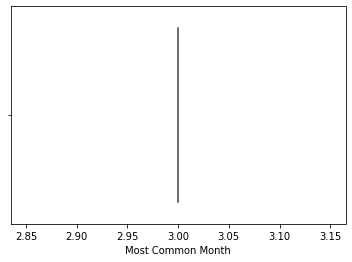

In [83]:
ax= sns.violinplot(x= max_Extent['Month'].mode())
#ax.set(xlim = (1, 30))
ax.set(xlabel="Most Common Month")


Build a scatter plot of minimum day vs. minimum extent.  Do you see a pattern?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Minimum Extent'), Text(0.5, 0, 'Minimum Day')]

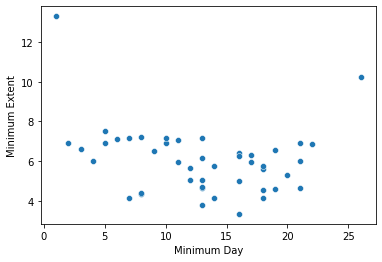

In [84]:
Yr_min_Extent = df1.groupby('Year')['Extent'].idxmin()
min_Extent = df1.loc[Yr_min_Extent,:]
#print(min_Extent)
x= min_day.Day
y= min_Extent.Extent
ax= sns.scatterplot(x, y)
ax.set(xlabel="Minimum Day", ylabel="Minimum Extent")


Submit your work as an attachment in email by November first at 11:59PM.  